# PyGrunn 2017
 * install:
  * (ana)conda: `conda install -c conda-forge vaex`
  * pip: `pip install --pre vaex`
 

In [8]:
import vaex
import numpy as np
import matplotlib.pylab as plt
plt.style.use('bigfont')
%matplotlib inline

In [9]:
1+2

3

In [13]:
ds = vaex.open("/Users/maartenbreddels/vaex/data/nytaxi/nyc_taxi2015.hdf5")
!ls -lh /Users/maartenbreddels/vaex/data/nytaxi/nyc_taxi2015.hdf5

-rw-r--r--@ 1 maartenbreddels  staff    23G Mar 29 07:32 /Users/maartenbreddels/vaex/data/nytaxi/nyc_taxi2015.hdf5


In [14]:
ds

column,type,unit,description,expression
VendorID,int64,,,
dropoff_dayofweek,float64,,,
dropoff_hour,float64,,,
dropoff_latitude,float64,,,
dropoff_longitude,float64,,,
extra,float64,,,
fare_amount,float64,,,
improvement_surcharge,float64,,,
mta_tax,float64,,,
passenger_count,int64,,,


In [15]:
ds.count()

146112989.0

In [16]:
%%time
ds.count("pickup_latitude")

CPU times: user 621 ms, sys: 1.14 s, total: 1.76 s
Wall time: 1.33 s


143807893.0

In [17]:
ds.mean("pickup_latitude")

40.750600575372047

In [18]:
ds.count(binby="pickup_latitude", limits=[40.5, 41])

array([  4.10000000e+01,   3.40000000e+01,   3.60000000e+01,
         4.70000000e+01,   1.03000000e+02,   1.66000000e+02,
         7.20000000e+01,   8.30000000e+01,   6.80000000e+01,
         9.70000000e+01,   9.30000000e+01,   5.90000000e+01,
         1.20000000e+02,   8.40000000e+01,   1.09000000e+02,
         1.65000000e+02,   1.27000000e+02,   1.73000000e+02,
         2.53000000e+02,   9.70000000e+02,   7.93000000e+02,
         1.63700000e+03,   1.23500000e+03,   1.05600000e+03,
         1.53800000e+03,   1.82200000e+03,   1.82600000e+03,
         2.30300000e+03,   2.42300000e+03,   3.79700000e+03,
         3.82400000e+03,   4.67500000e+03,   3.98900000e+03,
         6.77900000e+03,   8.79900000e+03,   1.11450000e+04,
         7.02189000e+05,   2.05215400e+06,   3.30456000e+05,
         3.20690000e+04,   3.91210000e+04,   4.22370000e+04,
         4.75130000e+04,   7.15520000e+04,   9.84480000e+04,
         1.78168000e+05,   2.20416000e+05,   2.37613000e+05,
         2.79931000e+05,

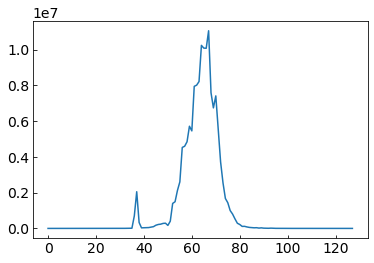

In [19]:
plt.plot(_)

In [20]:
counts2d = ds.count(binby=["pickup_longitude", "pickup_latitude"], shape=128)
print(counts2d.shape)

(128, 128)


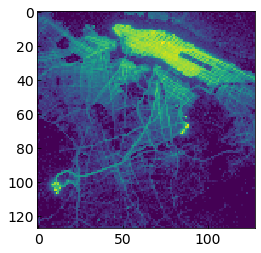

In [21]:
plt.imshow(np.log10(counts2d+1))

In [22]:
limits = ds.limits(["pickup_longitude", "pickup_latitude"], "98%")
print(limits)

[array([-74.03799976, -73.774866  ]), array([ 40.6379567 ,  40.81379327])]


CPU times: user 2.64 s, sys: 52.9 ms, total: 2.7 s
Wall time: 955 ms


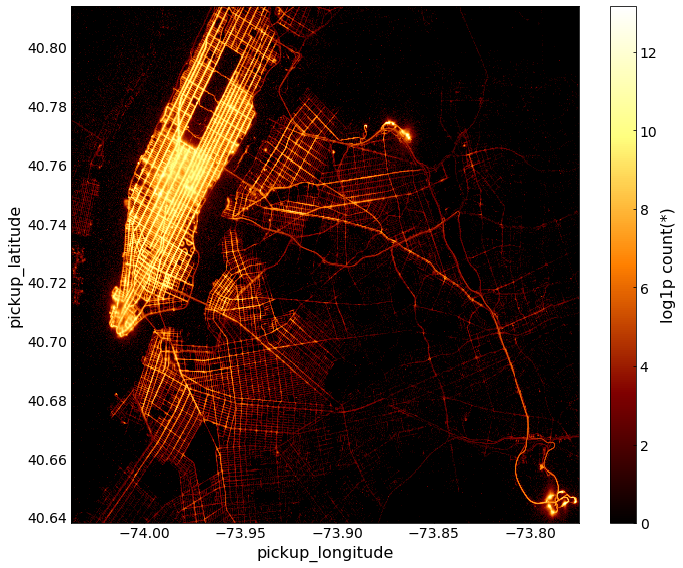

In [23]:
%%time
ds.plot("pickup_longitude", "pickup_latitude", f="log1p",
        limits=limits, figsize=(10,8), shape=512)

In [ ]:
# %%timeit
# counts2d = ds.count(binby=["pickup_longitude", "pickup_latitude"], shape=128, limits=limits)#, limits=[[-90, 90], [-180, 180]])

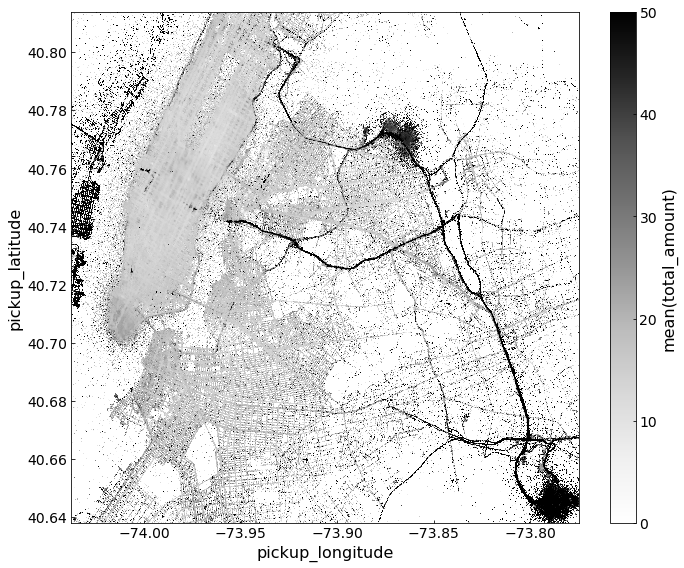

In [24]:
ds.plot("pickup_longitude", "pickup_latitude", what="mean(total_amount)",
        vmin=0, vmax=50, shape=512, figsize=(10,8), limits=limits, colormap="Greys")

In [25]:
%%time
ds.minmax("trip_distance")

CPU times: user 664 ms, sys: 2.69 s, total: 3.35 s
Wall time: 4.21 s


array([ -4.08401244e+07,   1.98623014e+08])

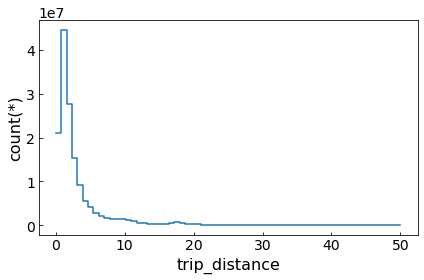

In [26]:
ds.plot1d("trip_distance", limits=[0, 50])

In [27]:
ds.select("(trip_distance > 0) & (trip_distance < 40)")

<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide


CPU times: user 6.6 s, sys: 2.02 s, total: 8.62 s
Wall time: 3.78 s


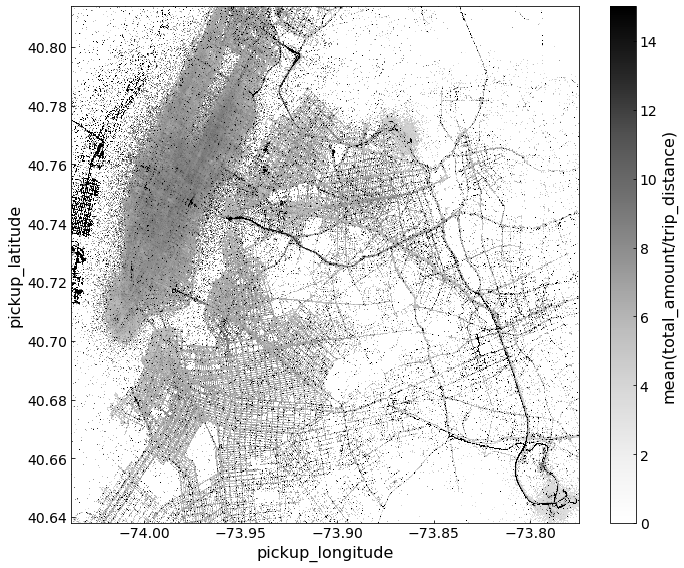

In [28]:
%%time
ds.plot("pickup_longitude", "pickup_latitude", what="mean(total_amount/trip_distance)",
       vmin=0, vmax=15,
       shape=512, figsize=(10,8), selection=True, limits=limits, colormap="Greys")

# A Billion stars in the notebook

In [29]:
gaia = vaex.open("ws://gaia:9000/gaia-dr1")

In [30]:
f"{len(gaia):,}" # python3.6 f-strings!

'1,142,679,769'

CPU times: user 487 ms, sys: 89.5 ms, total: 577 ms
Wall time: 2.91 s


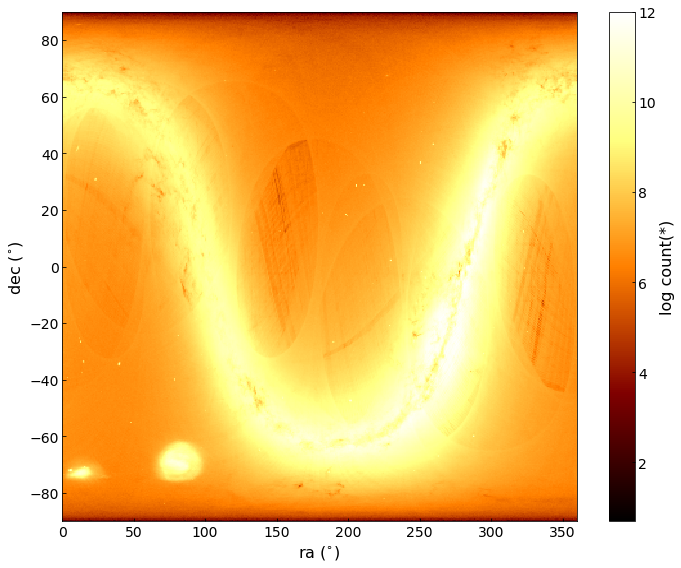

In [31]:
%%time
ra_dec_limits = [[0, 360], [-90, 90]]
gaia.plot("ra", "dec", limits=ra_dec_limits, f="log", figsize=(10,8), shape=400)